In [1]:
import sys
!{sys.executable} -m pip install colossus
!{sys.executable} -m pip install emcee
!{sys.executable} -m pip install corner

In [2]:
import numpy as np
from colossus.cosmology import cosmology
from colossus.lss import mass_function
from matplotlib import pyplot as plt
from astropy.cosmology import FlatLambdaCDM
from astropy.cosmology import LambdaCDM

import emcee
import corner





343740643.81245166 Mpc3


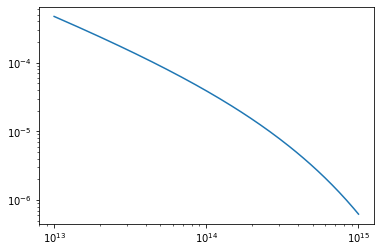

In [85]:
# Let us compute the comoving volume
cosmo = LambdaCDM(H0=67.2, Om0=0.31, Ob0=0.049, Ode0=0.641)

CVolume = cosmo.comoving_volume(0.1)

print(CVolume)
## cosmology.setCosmology('WMAP9') This is a default cosmology

params = {'flat': True, 'H0': 67.2, 'Om0': 0.31, 'Ob0': 0.049, 'sigma8': 0.81, 'ns': 0.95} # This sets a customized cosmology
cosmology.addCosmology('myCosmo', params)
cosmo = cosmology.setCosmology('myCosmo')

# Array of masses
m_arr = np.geomspace(1E13,1E15,128)

##for mass in m_arr:
mfunc_so = mass_function.massFunction(m_arr, 0.0, mdef = 'vir', model = 'despali16', q_out = 'dndlnM') # q_out modifies the output function
##    mfunc_fof = mass_function.massFunction(mass, 0.0, mdef = 'fof', model = 'watson13', q_out = dndlnM))
plt.loglog(m_arr,  mfunc_so)


plt.show()   

In [51]:
a = np.load('converted_catalog_z0.000_mock0001.npz') # Import the catalog and read through it
print(a.files)
print(a['mass'].shape)
print(a['mass'].shape)
print(np.min(a['mass']))
print(len(a['mass']))



['mass', 'pos']
(2772758,)
(2772758,)
67770034702577.14
2772758


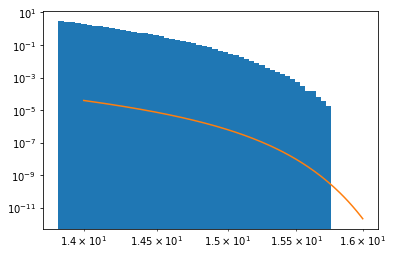

In [86]:
plt.hist(np.log10(a['mass']), bins=51, density=True) #Histogram of log-mass catalog, density=True gives a normalized histogram
m_arr = np.geomspace(1E14,1E16,128)


mfunc_so = mass_function.massFunction(m_arr, 0.0, mdef = 'vir', model = 'despali16', q_out = 'dndlnM') # q_out modifies the output function
plt.loglog(np.log10(m_arr), mfunc_so)


plt.show()